#  Unit 2.2 Blog Point Answers
> Work for unit 2.2 
- toc: true
- image: /images/pythonlogo.png
- tags: [Week 26]

# Extra: Red/Blue/Green Scale using numpy
**METHOD**
- By researching that greyscaling an image and then maximizing the red value I can redscale an image, I decided to implement this.
- One thing (and issue I have with this class) is that the images mutate the main image. I understand why this could be necessary, but having a store of the image in greyscale and returning that rather than mutating the image would help. 

---- meta data -----
Green Square
Internet
green-square-16.png
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (320, 320)
-- scaled image --



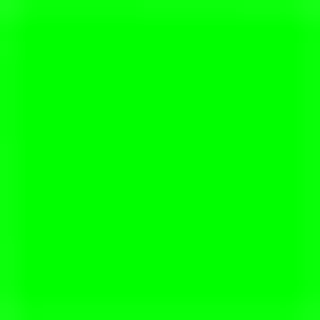

--- grey image ---



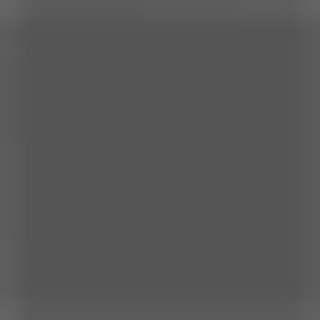

--- red image ---



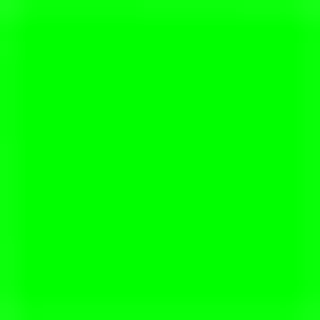

--- green image ---



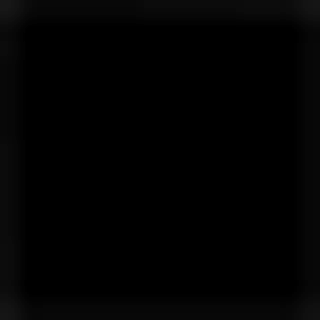

--- blue image ---



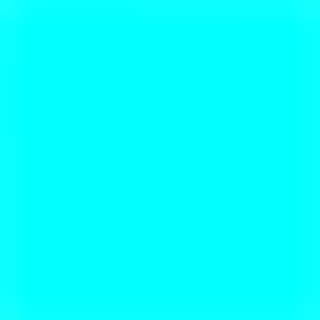

---- meta data -----
Clouds Impression
Peter Carolin
clouds-impression.png
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (320, 234)
-- scaled image --



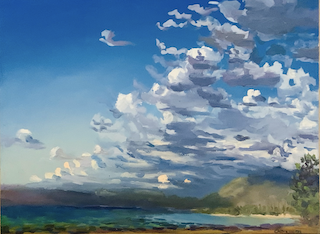

--- grey image ---



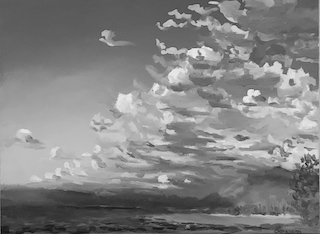

--- red image ---



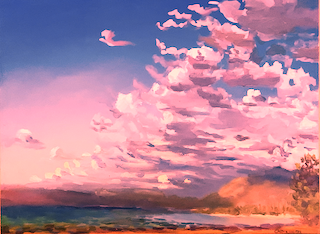

--- green image ---



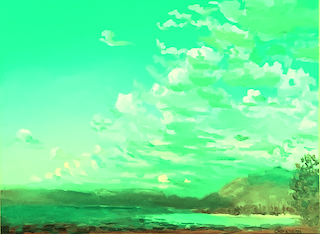

--- blue image ---



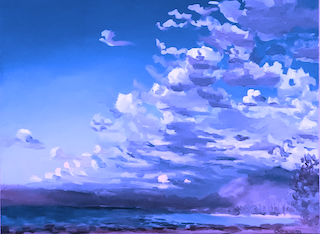

---- meta data -----
Lassen Volcano
Peter Carolin
lassen-volcano.jpg
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (320, 240)
-- scaled image --



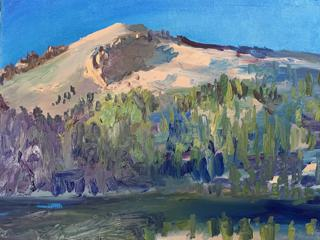

--- grey image ---



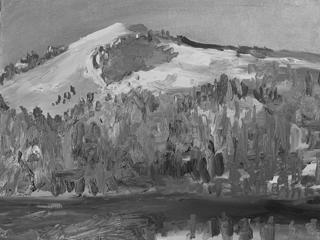

--- red image ---



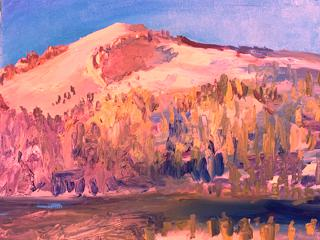

--- green image ---



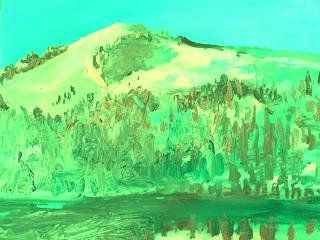

--- blue image ---



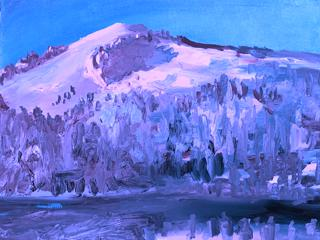

---- meta data -----
This world
Amongus
sadge.jpeg
JPEG
RGB
Original size:  (225, 225)
Scaled size:  (320, 320)
-- scaled image --



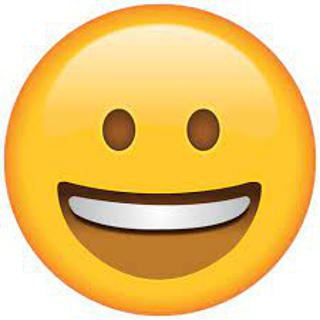

--- grey image ---



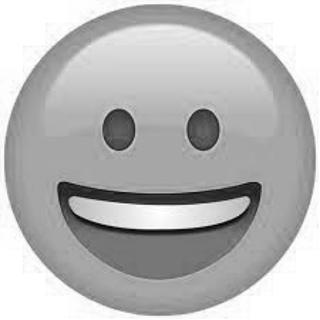

--- red image ---



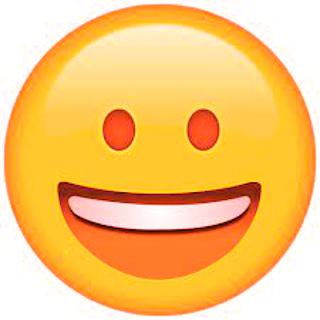

--- green image ---



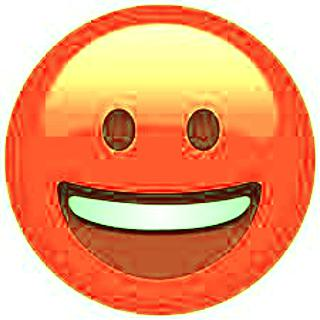

--- blue image ---



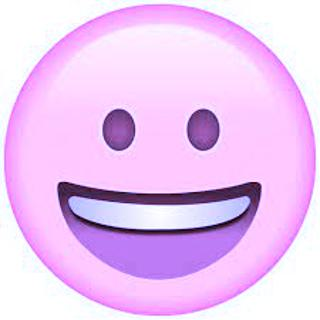

In [21]:
# Importing Mr.Mortensen's class

from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np


class Image_Data:

    def __init__(self, source, label, file, path, baseWidth=320):
        self._source = source    # variables with self prefix become part of the object, 
        self._label = label
        self._file = file
        self._filename = path / file  # file with path
        self._baseWidth = baseWidth

        # Open image and scale to needs
        self._img = pilImage.open(self._filename)
        self._format = self._img.format
        self._mode = self._img.mode
        self._originalSize = self.img.size
        self.scale_image()
        self._html = self.image_to_html(self._img)
        self._html_grey = self.image_to_html_grey()
        self.html_red = self.redScale()
        self.html_blue = self.blueScale()
        self.html_green = self.greenScale()

    @property
    def source(self):
        return self._source  
    
    @property
    def label(self):
        return self._label 
    
    @property
    def file(self):
        return self._file   
    
    @property
    def filename(self):
        return self._filename   
    
    @property
    def img(self):
        return self._img
             
    @property
    def format(self):
        return self._format
    
    @property
    def mode(self):
        return self._mode
    
    @property
    def originalSize(self):
        return self._originalSize
    
    @property
    def size(self):
        return self._img.size
    
    @property
    def html(self):
        return self._html
    
    @property
    def html_grey(self):
        return self._html_grey
        
    # Large image scaled to baseWidth of 320
    def scale_image(self):
        scalePercent = (self._baseWidth/float(self._img.size[0]))
        scaleHeight = int((float(self._img.size[1])*float(scalePercent)))
        scale = (self._baseWidth, scaleHeight)
        self._img = self._img.resize(scale)
    
    # PIL image converted to base64
    def image_to_html(self, img):
        with BytesIO() as buffer:
            img.save(buffer, self._format)
            return '<img src="data:image/png;base64,%s">' % base64.b64encode(buffer.getvalue()).decode()
            
    # Create Grey Scale Base64 representation of Image
    def image_to_html_grey(self):
        img_grey = self._img.copy()
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        grey_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
            if len(pixel) > 3:
                grey_data.append((average, average, average, pixel[3])) # PNG format
            else:
                grey_data.append((average, average, average))
            # end for loop for pixels
            
        img_grey.putdata(grey_data)
        return self.image_to_html(img_grey)
    def redScale(self): # added redscale
        img_grey = self._img.copy()
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        grey_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            redPix = int(pixel[0]*2)# average pixel values and use // for integer division
            if len(pixel) > 3:
                grey_data.append((redPix, pixel[1], pixel[2], pixel[3])) # PNG format
            else:
                grey_data.append((redPix, pixel[1], pixel[2]))
        
        img_grey.putdata(grey_data)
        return self.image_to_html(img_grey)
    
    def blueScale(self): # added bluescale
        img_grey = self._img.copy()
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        grey_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            bluePix = int(pixel[1]*2)# average pixel values and use // for integer division
            if len(pixel) > 3:
                grey_data.append((pixel[0], pixel[1], bluePix, pixel[3])) # PNG format
            else:
                grey_data.append((pixel[0], pixel[1], bluePix))
        
        img_grey.putdata(grey_data)
        return self.image_to_html(img_grey)

    def greenScale(self): # added greenscale
        img_grey = self._img.copy()
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        grey_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            greenPix = int(pixel[2]*2)# average pixel values and use // for integer division
            if len(pixel) > 3:
                grey_data.append((pixel[0], greenPix, pixel[2], pixel[3])) # PNG format
            else:
                grey_data.append((pixel[0], greenPix, pixel[2]))
        
        img_grey.putdata(grey_data)
        return self.image_to_html(img_grey)

        

        
# prepares a series of images, provides expectation for required contents
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"},
            {'source': "Amongus", 'label':  "This world", 'file': "sadge.jpeg"}
        ]
    return path, images

# turns data into objects
def image_objects():        
    id_Objects = []
    path, images = image_data()
    for image in images:
        id_Objects.append(Image_Data(source=image['source'], 
                                  label=image['label'],
                                  file=image['file'],
                                  path=path,
                                  ))
    return id_Objects

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    for ido in image_objects(): # ido is an Imaged Data Object
        
        print("---- meta data -----")
        print(ido.label)
        print(ido.source)
        print(ido.file)
        print(ido.format)
        print(ido.mode)
        print("Original size: ", ido.originalSize)
        print("Scaled size: ", ido.size)
        
        print("-- scaled image --")
        display(HTML(ido.html))
        
        print("--- grey image ---")
        display(HTML(ido.html_grey))

        print("--- red image ---")
        display(HTML(ido.html_red))

        print("--- green image ---")
        display(HTML(ido.html_green))

        print("--- blue image ---")
        display(HTML(ido.html_blue))



        
    print()